### Ejercicio tipo parcial - TC2

<img src="./Consigna1.PNG" align="center" width="70%" />
<img src="./Consigna2.PNG" align="center" width="70%" />

####  Ejercicio 1)



<img src="./1.PNG" align="center" width="50%" />
<img src="./2.PNG" align="center" width="50%" />
<img src="./3.PNG" align="center" width="60%" />
<img src="./4.PNG" align="center" width="50%" />

Asumo que el factor lineal  4.18 no se puede implementar de manera pasiva, y que en la transferencia implementada con componentes, me "faltarán" aproximadamente 12,42dB. Por tanto, para W0 debería tener -1dB - 12.42dB = -13.4dB



[0.98261336]
[1.         1.09773433 1.10251033]
[1.30629505 0.         0.        ]
[1.         1.26568768 3.46568715 1.26568768 1.        ]


(1,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000221FDD7B488>,
       dtype=object))

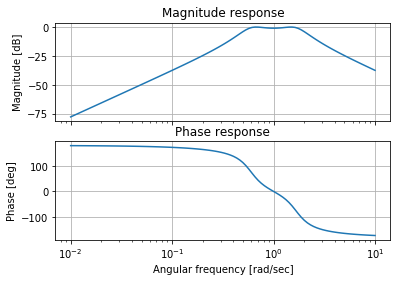

In [83]:
import numpy as np
import scipy.signal as sig
from splane import analyze_sys
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction
from splane import pzmap, grpDelay, bodePlot, convert2SOS

nn =2
alfa_max = 1
z,p,k = sig.cheb1ap(nn, alfa_max)
num, den = sig.zpk2tf(z,p,k)
num_bp, den_bp = sig.lp2bp(num, den, bw = 1.153)
print(num)
print(den)

print(num_bp)
print(den_bp)
filtro_bp = TransferFunction(num_bp, den_bp)

bodePlot(filtro_bp)


Una vez encontradas las transferencias a implementar, planteo una celda RLC que replicaré para formar la T(S)
<img src="./CeldaRLC.PNG" align="center" width="40%" />

Siendo la transferencia de la misma:

$$
TCeldaRLC(S) = \frac{K(S(L/R))}{S^2(LC) + S((L/R))+1} 
\\
$$

<img src="./CircuitoCompleto.PNG" align="center" width="40%" />
$$
T(S) = T1(S)*T2(S) = \frac{K1(S(L1/R1))}{S^2(L1C1) + S((L1/R1))+1} * \frac{K2(S(L2/R2))}{S^2(L2C2) + S((L2/R2))+1} 
\\
$$

Para los valores, considero las transferencias 
$$
T1(S) = \frac{3.43(S*0.33)}{S^2(0.358) + S((0.33))+1}
\\
$$

$$
T2(S) = \frac{1.22(S*0.9322)}{S^2(2.8) + S((0.9322))+1}
\\
$$

<b>Calculo componentes T1</b>

Fijo C1 = 1 y obtengo L1 = 0.358Hy y R = 1.0848 Ω

Considerando una norma de Z de 1KΩ y desnormalizando para W0 = 20,78k 1/s obtengo

C1 = 48.12nF, L1 = 17.22mHy, R1=1.08kΩ

Por lo que recalculo los valores considerando C1 = 47nF, que equivalen a C1 = 0.976 normalizados.

Recalculo todo y obtengo:
<b> C1= 47nF, R1= 1,1K, L1=17,61mHy </b>

<b>Calculo componentes T2</b>

IDEM procedimiento
<b>R2=3kΩ, C2=47nF, L2 = 137,6mHy</b> 


Simulo y obtengo la transferencia:

<img src="./Tf1-L.PNG" align="center" width="50%" />

Paso a activar el circuito. Para este fin utilizaré GIC's con la siguiente estructura:


<img src="./GIC.PNG" align="center" width="30%" />

Considerando Zin(S) del GIC como:

$$
Zin(S) = \frac{Z5Z3Z1}{Z2Z4}
\\
$$

Sea Z4 un capacitor, se obtiene una Zin(S) = S*Leq

Siendo $$ Leq= \frac{CR5R3R1}{R2}
\\
$$

Obtengo entonces para L1 = 17.61mHy los siguientes valores normalizados de resistencia:
<b>
R1 = R3 = 100K \
C1 = 1pF \
R2 = 3.9K \
R5 = 6.8K \
 

Obteniendo una Leq1 = 17.43mHy
    </b>   

IDEM para L2, siendo L2 = 137.6mHy obtengo: \
<b>
R1 = R3 = 10K \
C1 = 1nF \
R2 = 5.6K \
R5 = 7.5K \
Obteniendo una Leq2 = 133.92mHy
</b> 


Simulo y obtengo:

<img src="./CircuitoCompletoGIC.PNG" align="center" width="70%" />
<img src="./Wo.PNG" align="center" width="70%" />
<img src="./Wo-cursores.PNG" align="center" width="70%" />

Considerando el valor inicial en W0 de -13.31dB, notamos entonces que para W=2kHz (f=636Hz), el módulo de la T es -24,78dB menor. Y para W=80Khz (f=12,7Khz), el módulo de la T es -18,41dB menor.

<img src="./Ej2-1.png" align="center" width="45%" />
<img src="./Ej2-2.png" align="center" width="45%" />
<img src="./Ej2-3.PNG" align="center" width="50%" />
<img src="./Ej2-4.png" align="center" width="50%" />

El parámetro A corresponde a la transferencia inversa de tensión, por lo que la transferencia de tensión es 1/A
$$
\frac{V2}{V1}(S) = \frac{-KY22A+Y22B}{-KY21A+Y21B}
\\
$$

A continuación se comprueba con código Python

In [84]:
from sympy import *
import math as m
import sys
Y11A, Y12A, Y21A, Y22A, K =symbols('Y11A Y12A Y21A Y22A K')
TA=Matrix(([-(Y22A/Y21A),-1/Y21A],
        [(Y21A*Y12A-Y22A*Y11A)/Y21A, -Y11A/Y21A]))
TA

Matrix([
[                   -Y22A/Y21A,    -1/Y21A],
[(-Y11A*Y22A + Y12A*Y21A)/Y21A, -Y11A/Y21A]])

In [85]:
TC = Matrix(([1,0],
        [(0), -1/K]))

TC

Matrix([
[1,    0],
[0, -1/K]])

In [86]:
TAC = TA * TC
TAC




Matrix([
[                   -Y22A/Y21A,    1/(K*Y21A)],
[(-Y11A*Y22A + Y12A*Y21A)/Y21A, Y11A/(K*Y21A)]])

In [87]:
deter_TAC=TAC.det()
deter_TAC_cancel= cancel(deter_TAC)
deter_TAC_cancel

-Y12A/(K*Y21A)

In [88]:
YAC = Matrix(([TAC[3]/TAC[1],-deter_TAC_cancel/TAC[1]],
        [-1/TAC[1], TAC[0]/TAC[1]]))
YAC

Matrix([
[   Y11A,    Y12A],
[-K*Y21A, -K*Y22A]])

In [89]:
Y11B, Y12B, Y21B, Y22B=symbols('Y11B Y12B Y21B Y22B')
YB=Matrix(([Y11B,Y12B],
        [Y21B, Y22B]))
YB

Matrix([
[Y11B, Y12B],
[Y21B, Y22B]])

In [90]:
YT = YB + YAC
YT

Matrix([
[   Y11A + Y11B,    Y12A + Y12B],
[-K*Y21A + Y21B, -K*Y22A + Y22B]])

In [91]:
deter_YT = YT.det()
deter_YT_cancel = (simplify((deter_YT)))
deter_YT_cancel

-(Y11A + Y11B)*(K*Y22A - Y22B) + (Y12A + Y12B)*(K*Y21A - Y21B)

In [92]:
TT = (([YT[3]/YT[2],YT[1]],
        [deter_YT_cancel/YT[2], YT[0]/YT[2]]))
YT[2]/YT[3]

(-K*Y21A + Y21B)/(-K*Y22A + Y22B)